### Importing needed libaries




Task 1 - Iris

 The Iris dataset is one of the most famous datasets used in the field of machine learning and statistics for classification and pattern recognition tasks.

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data plotting
import os

### Load Training Data and model creation

In [ ]:
!wget --no-check-certificate 'https://www.dropbox.com/scl/fi/gn42yc7dvnjs80ehtfcma/pb1_train.csv?rlkey=32d02hh7rqnv27mkv3b75ytdv&dl=0' -O ./data_train.csv

--2024-03-01 06:31:15--  https://www.dropbox.com/scl/fi/gn42yc7dvnjs80ehtfcma/pb1_train.csv?rlkey=32d02hh7rqnv27mkv3b75ytdv&dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.4.18, 2620:100:6019:18::a27d:412
Connecting to www.dropbox.com (www.dropbox.com)|162.125.4.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc62bbfd836dd4982a14e87b66e9.dl.dropboxusercontent.com/cd/0/inline/CONHewoC0sskvHEyZMQf-3FhAGo-hYkvcQm0eRT7GJ0Wq_kVrUW-rjS0OtDWrBrHonUIPoqxso6ZTgHdXmoqQVjUZGHW1gNJlwqTBC37ezhUWiijt6XzMxOffacmvR6edijNDYBDts6hPuT3CliKqfWp/file# [following]
--2024-03-01 06:31:15--  https://uc62bbfd836dd4982a14e87b66e9.dl.dropboxusercontent.com/cd/0/inline/CONHewoC0sskvHEyZMQf-3FhAGo-hYkvcQm0eRT7GJ0Wq_kVrUW-rjS0OtDWrBrHonUIPoqxso6ZTgHdXmoqQVjUZGHW1gNJlwqTBC37ezhUWiijt6XzMxOffacmvR6edijNDYBDts6hPuT3CliKqfWp/file
Resolving uc62bbfd836dd4982a14e87b66e9.dl.dropboxusercontent.com (uc62bbfd836dd4982a14e87b66e9.dl.dropboxusercontent.com)... 162.125.4.15, 

In [ ]:
#importing the data
data = pd.read_csv('data_train.csv')

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [ ]:
data = data.sample(frac=1).reset_index(drop=True)

In [ ]:
# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Randomize Iris dataset
indices = np.arange(X.shape[0])
np.random.shuffle(indices)
X = X[indices]

In [ ]:
class CustomLogisticRegression:
    def __init__(self, learning_rate=0.0898, num_iterations=500, regularization_strength=0.11):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.regularization_strength = regularization_strength
        self.weights = None
        self.bias = None

    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def _compute_cost(self, X, y):
        m = X.shape[0]
        z = np.dot(X, self.weights) + self.bias
        y_pred = self._sigmoid(z)
        cost = (-1 / m) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
        # Add regularization term to the cost
        regularization_term = (self.regularization_strength / (2 * m)) * np.sum(self.weights ** 2)
        return cost + regularization_term

    def fit(self, X, y):
        m, n = X.shape
        self.weights = np.zeros(n)
        self.bias = 0

        for i in range(self.num_iterations):
            z = np.dot(X, self.weights) + self.bias
            y_pred = self._sigmoid(z)

            dw = (1 / m) * np.dot(X.T, (y_pred - y)) + (self.regularization_strength / m) * self.weights
            db = (1 / m) * np.sum(y_pred - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            # Print cost for every 100 iterations
            if i % 100 == 0:
                cost = self._compute_cost(X, y)
                print(f"Iteration {i}: Cost = {cost:.4f}")

    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        y_pred = self._sigmoid(z)
        return (y_pred > 0.5).astype(int)

In [ ]:
# Extract features and target variable
X = data.drop(columns=['species'])
y = (data['species'] == 'setosa').astype(int)  # Convert species to binary label

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Hyperparameters for fine-tuning
learning_rate =0.0898
num_iterations = 500
regularization_strength = 0.11

# Instantiate and train the custom logistic regression model
model = CustomLogisticRegression(learning_rate=learning_rate, num_iterations=num_iterations,
                                 regularization_strength=regularization_strength)
model.fit(X_train_scaled, y_train)

# Predictions
y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)



Iteration 0: Cost = 0.6709
Iteration 100: Cost = 0.1171
Iteration 200: Cost = 0.0594
Iteration 300: Cost = 0.0393
Iteration 400: Cost = 0.0293


In [ ]:
# Calculate training and testing accuracy

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f"Training Accuracy: {accuracy_train:.4f}")
print(f"Testing Accuracy: {accuracy_test:.4f}")


Training Accuracy: 1.0000
Testing Accuracy: 1.0000


### Inspect and analyse the data

In [ ]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,6.7,3.1,4.4,1.4,not Setosa
1,5.4,3.4,1.7,0.2,Setosa
2,5.8,2.7,3.9,1.2,not Setosa
3,7.7,3.8,6.7,2.2,not Setosa
4,5.4,3.9,1.7,0.4,Setosa


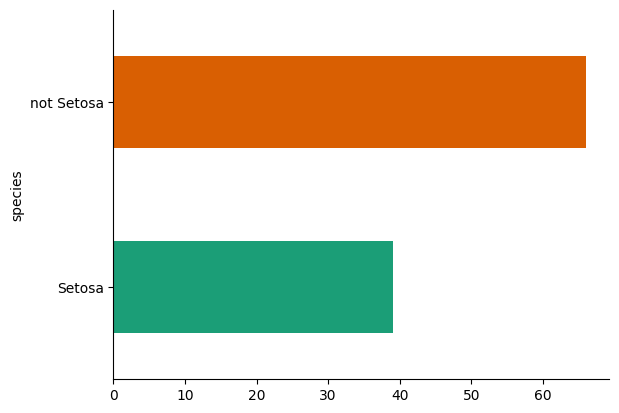

In [ ]:
# @title species

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('species').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

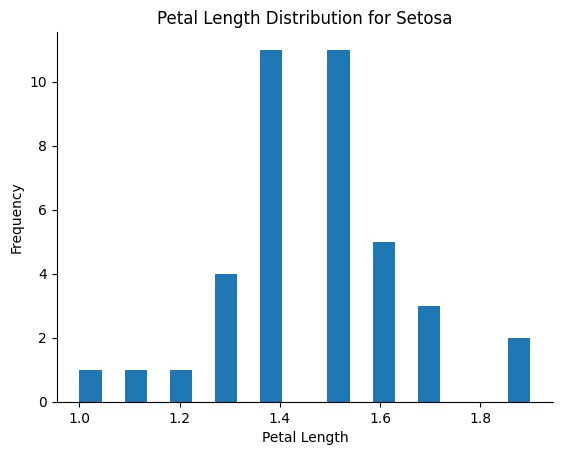

In [ ]:
from matplotlib import pyplot as plt

# Filter the dataset for 'setosa' species
setosa_data = data[data['species'] == 'Setosa']

# Plot histogram of petal length for 'setosa' species
setosa_data['petal_length'].plot(kind='hist', bins=20, title='Petal Length Distribution for Setosa')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.xlabel('Petal Length')
plt.ylabel('Frequency')
plt.show()


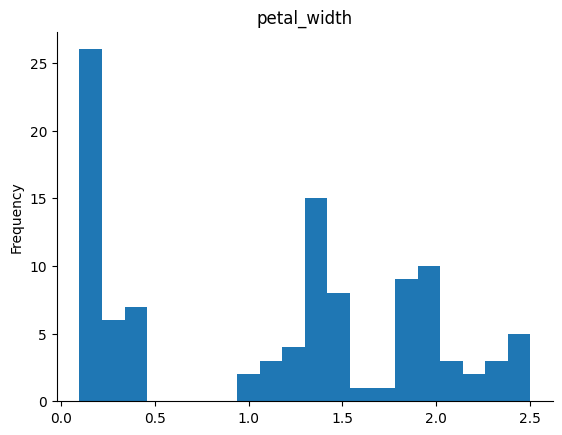

In [ ]:
# @title petal_width

from matplotlib import pyplot as plt
data['petal_width'].plot(kind='hist', bins=20, title='petal_width')
plt.gca().spines[['top', 'right',]].set_visible(False)

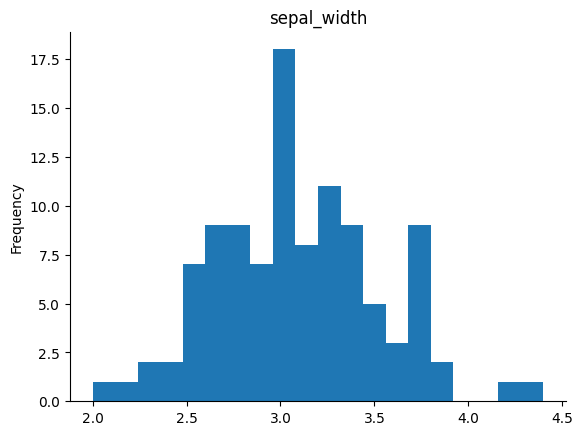

In [ ]:
from matplotlib import pyplot as plt
data['sepal_width'].plot(kind='hist', bins=20, title='sepal_width')
plt.gca().spines[['top', 'right',]].set_visible(False)

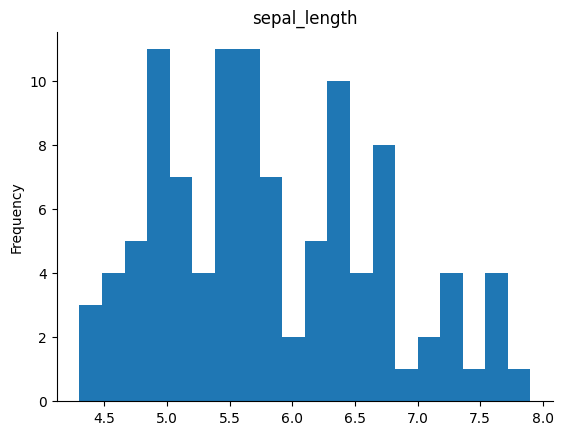

In [ ]:
from matplotlib import pyplot as plt
data['sepal_length'].plot(kind='hist', bins=20, title='sepal_length')
plt.gca().spines[['top', 'right',]].set_visible(False)

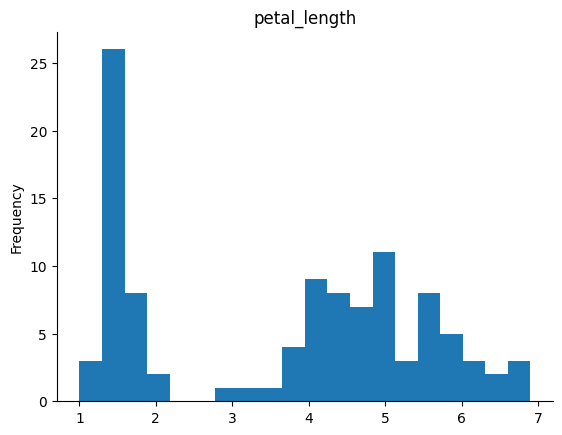

In [ ]:
from matplotlib import pyplot as plt
data['petal_length'].plot(kind='hist', bins=20, title='petal_length')
plt.gca().spines[['top', 'right',]].set_visible(False)

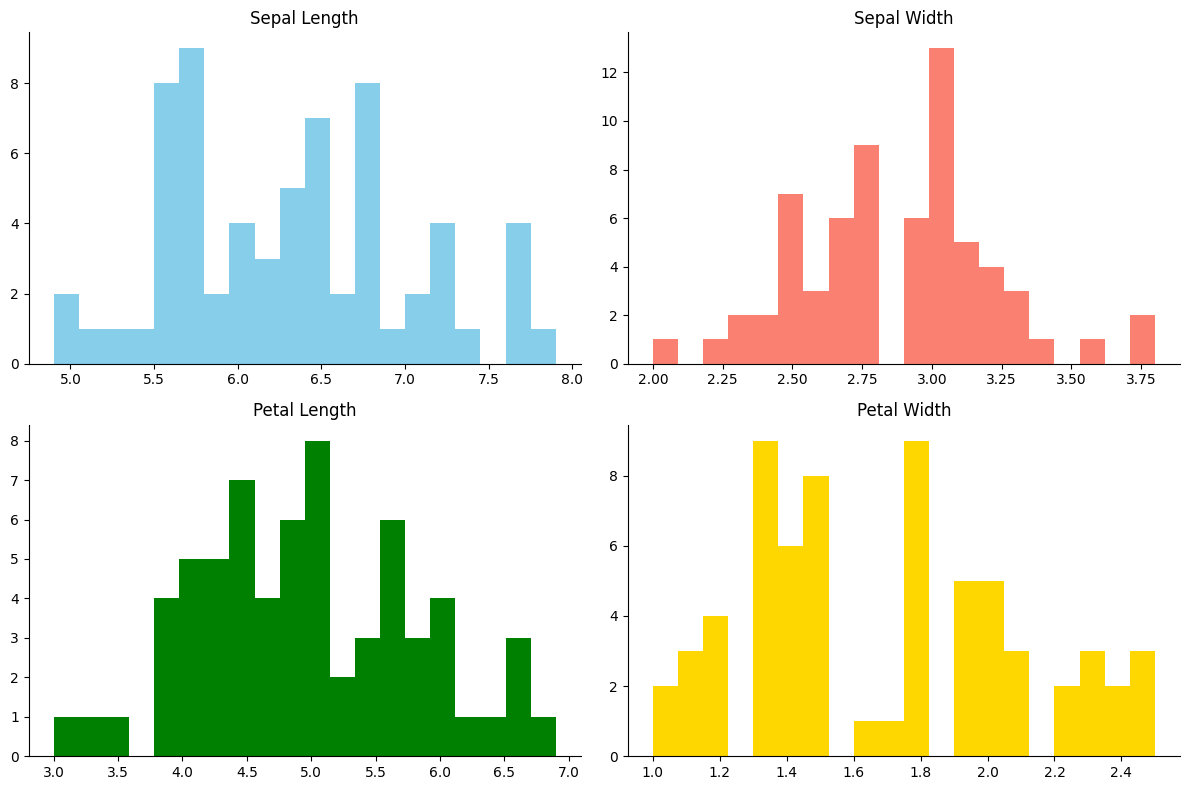

In [ ]:
from matplotlib import pyplot as plt

# Filter the dataset for 'setosa' species
setosa_data = data[data['species'] != 'Setosa']

# Plot histograms for all features
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot histogram for sepal length
axs[0, 0].hist(setosa_data['sepal_length'], bins=20, color='skyblue')
axs[0, 0].set_title('Sepal Length')

# Plot histogram for sepal width
axs[0, 1].hist(setosa_data['sepal_width'], bins=20, color='salmon')
axs[0, 1].set_title('Sepal Width')

# Plot histogram for petal length
axs[1, 0].hist(setosa_data['petal_length'], bins=20, color='green')
axs[1, 0].set_title('Petal Length')

# Plot histogram for petal width
axs[1, 1].hist(setosa_data['petal_width'], bins=20, color='gold')
axs[1, 1].set_title('Petal Width')

# Remove top and right spines
for ax in axs.flat:
    ax.spines[['top', 'right']].set_visible(False)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


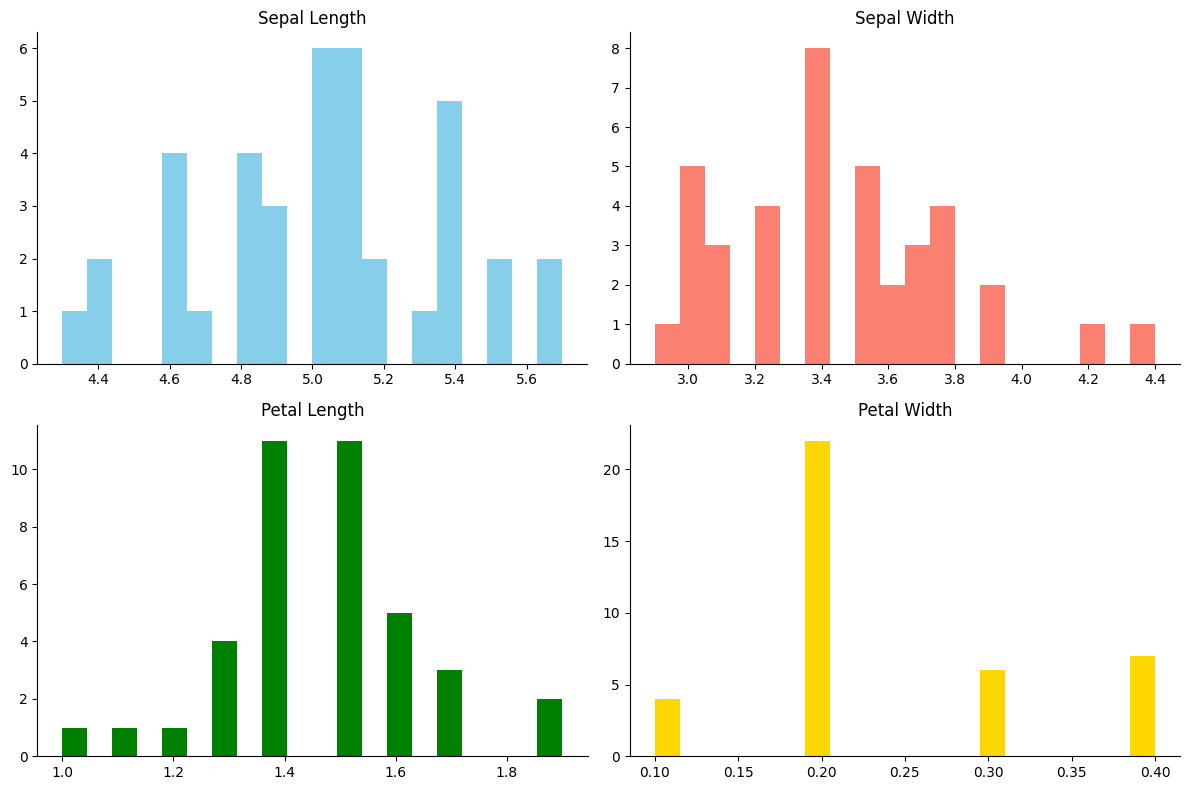

In [ ]:
from matplotlib import pyplot as plt

# Filter the dataset for 'setosa' species
setosa_data = data[data['species'] == 'Setosa']

# Plot histograms for all features
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot histogram for sepal length
axs[0, 0].hist(setosa_data['sepal_length'], bins=20, color='skyblue')
axs[0, 0].set_title('Sepal Length')

# Plot histogram for sepal width
axs[0, 1].hist(setosa_data['sepal_width'], bins=20, color='salmon')
axs[0, 1].set_title('Sepal Width')

# Plot histogram for petal length
axs[1, 0].hist(setosa_data['petal_length'], bins=20, color='green')
axs[1, 0].set_title('Petal Length')

# Plot histogram for petal width
axs[1, 1].hist(setosa_data['petal_width'], bins=20, color='gold')
axs[1, 1].set_title('Petal Width')

# Remove top and right spines
for ax in axs.flat:
    ax.spines[['top', 'right']].set_visible(False)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  105 non-null    float64
 1   sepal_width   105 non-null    float64
 2   petal_length  105 non-null    float64
 3   petal_width   105 non-null    float64
 4   species       105 non-null    object 
dtypes: float64(4), object(1)
memory usage: 4.2+ KB


In [ ]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,105.000000,105.000000,105.000000,105.000000
mean,5.824762,3.086667,3.671429,1.147619
std,0.863109,0.444208,1.839822,0.774360
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.500000,0.300000
50%,5.700000,3.000000,4.200000,1.300000
75%,6.400000,3.400000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Analysis and obeservations:


In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target